# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
dataset = pd.read_excel('RP_End_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   End time           1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
y = dataset['End time']
X = dataset.drop(['End time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=20,
                              input_shape=(X_train.shape[1],),
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=15,
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=10,
                              activation='softplus'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 566
Trainable params: 566
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [12]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [13]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 1s 11ms/step - loss: 1376.3308 - mae: 25.8226 - val_loss: 194.9214 - val_mae: 10.5508
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 162.9918 - mae: 9.6601 - val_loss: 118.6171 - val_mae: 7.3835
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 120.8795 - mae: 7.8989 - val_loss: 111.1711 - val_mae: 7.3393
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 114.1308 - mae: 7.7012 - val_loss: 109.0635 - val_mae: 6.7176
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 116.8439 - mae: 7.7444 - val_loss: 110.4793 - val_mae: 7.5066
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 108.6044 - mae: 7.2950 - val_loss: 118.3082 - val_mae: 8.4804
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 109.6089 - mae: 7.5065 - val_loss: 102.7714 - val_mae: 7.1594
Epoch 8/500
41/41 [==============================] 

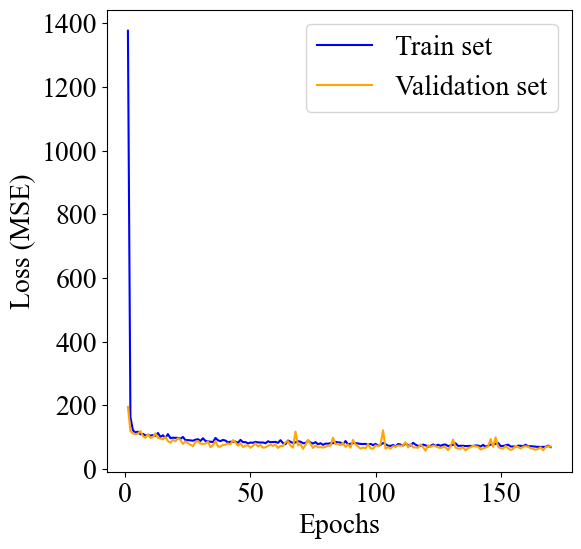

In [14]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('End_ANN4_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

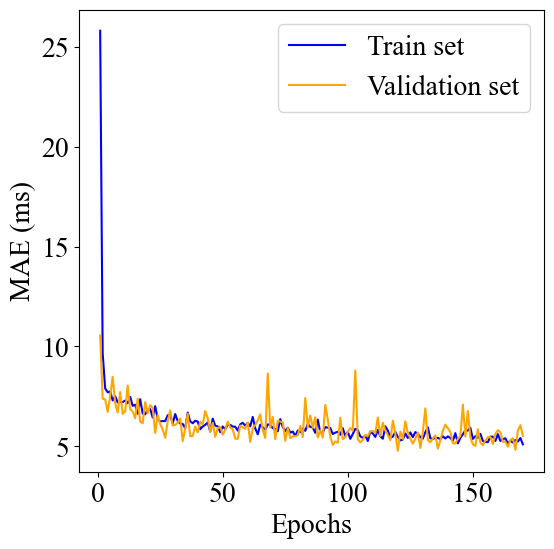

In [15]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (ms)')
plt.legend()
plt.savefig('End_ANN4_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [16]:
ann.save('End_ANN4')

INFO:tensorflow:Assets written to: End_ANN4\assets


# Part 4 - Make predictions

9/9 [==============================] - 0s 2ms/step


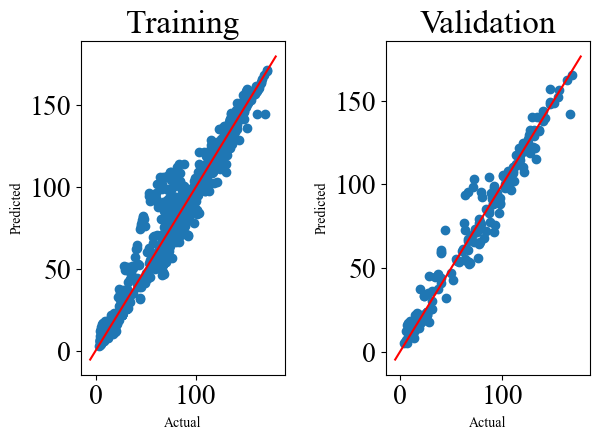

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
#plt.show()

plt.savefig('End_ANN4_1.png', dpi = 300, bbox_inches = 'tight')

In [8]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 4ms/step
[[ 81.25  85.17]
 [ 17.76  18.75]
 [ 93.1   53.98]
 [124.04 122.31]
 [ 12.63  12.83]
 [ 12.28  13.  ]
 [ 21.8   26.01]
 [109.61 113.4 ]
 [ 98.06 100.31]
 [ 20.46  20.  ]
 [100.1   60.05]
 [104.67 101.74]
 [110.75 113.29]
 [ 55.5   60.2 ]
 [ 11.87  12.65]
 [ 46.84  37.48]
 [120.2  126.39]
 [ 25.63  31.78]
 [ 11.89  12.7 ]
 [ 23.8   26.  ]
 [146.34 144.43]
 [ 15.97  18.  ]
 [ 19.21  17.57]
 [ 20.76  26.  ]
 [ 12.82   5.59]
 [107.03 100.82]
 [ 45.11  51.7 ]
 [ 19.93  20.31]
 [ 10.69  10.77]
 [ 91.45  81.92]
 [ 25.82  29.51]
 [ 72.69  75.12]
 [107.19 106.18]
 [ 18.85  20.  ]
 [154.37 152.76]
 [169.4  169.95]
 [ 12.57  10.58]
 [ 91.19  94.8 ]
 [101.8  100.76]
 [ 59.15  70.35]
 [107.32 101.5 ]
 [ 54.3   62.76]
 [148.2  142.91]
 [142.09 139.77]
 [ 18.95  19.44]
 [ 81.55  77.59]
 [144.65 145.59]
 [ 18.73  20.  ]
 [  7.62   6.75]
 [ 99.09 105.15]
 [152.19 148.09]
 [120.98 134.8 ]
 [ 11.86  13.  ]
 [ 88.11  99.14]
 [ 65.7   75.44]
 [168.87 167.6

Text(0, 0.5, 'Predicted data')

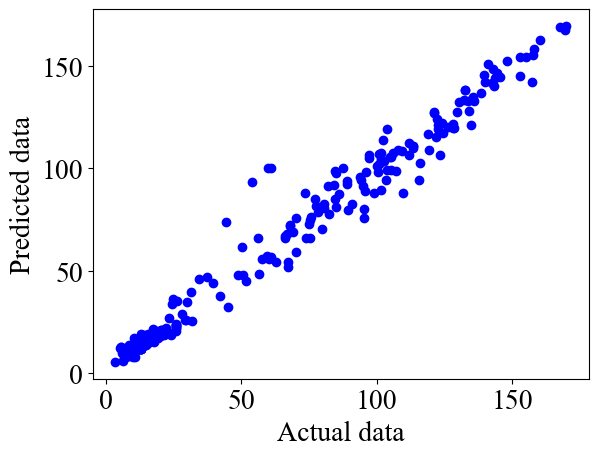

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.13],[0,0.13], color = "red")
#plt.axis ([0,0.13,0,0.13])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

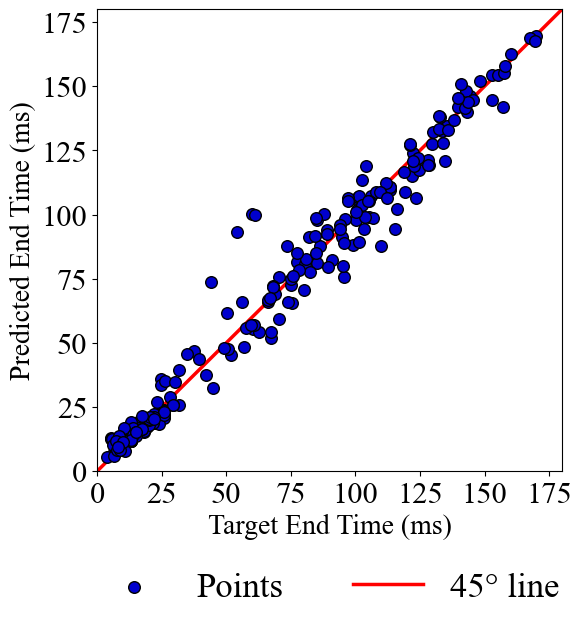

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

b_l = 0
u_l = 180

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted End Time (ms)')
plt.xlabel('Target End Time (ms)')
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175],fontsize = 22)
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175],fontsize = 22)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 25)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')

plt.savefig('End_ANN4.png', dpi = 300, bbox_inches = 'tight')

In [21]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 1ms/step
4.82831661290706
4.432121611300007


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9770668463591937


In [23]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9692402267192413


In [24]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 41.44%
Within 10% margin 66.92%
Within 20% margin 86.69%
Out of 20% margin 13.31%


In [25]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9768012113749373


In [26]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

7.339184026044857

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

4.432121611300007

In [7]:
ann = load_model('End_ANN4')

## SHAP

In [9]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


39/39 [==============================] - 0s 2ms/step


Using 1223 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1223 [00:00<?, ?it/s]

230/230 [==============================] - 0s 1ms/step


In [11]:
plt.rcdefaults()

-18.808758110595775 17.21875900623136


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


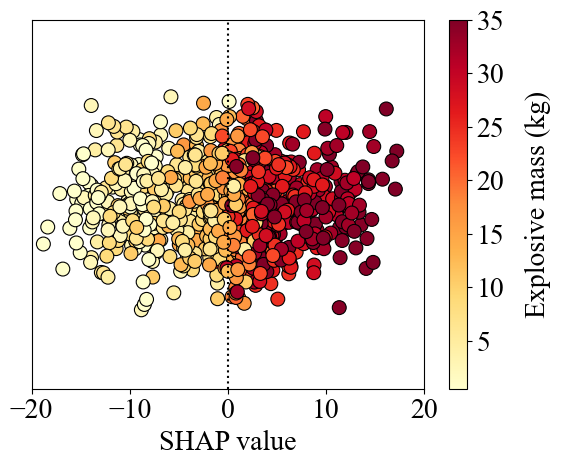

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 18 

selected_shap_values = shap_values[0]

# Assuming shap_values2 is the SHAP values array and X_train is the NumPy array
feature_idx = 0  # Index of the feature you want to visualize

# Extract the SHAP values and feature values for the specific feature
feature_shap_values = selected_shap_values[:, feature_idx]  # SHAP values for the feature
feature_values = X_train[:, feature_idx]  # Feature values

# Set up the plot
plt.figure(figsize=(6, 5))

# Create a jitter for y-values to better visualize overlapping points
y_random_jitter = np.random.normal(loc=0, scale=0.1, size=feature_shap_values.size)

# Set y-axis limits
plt.ylim(-0.5, 0.5)
print(min(feature_shap_values), max(feature_shap_values))
plt.xlim(-20, 20) 

# Plot the scatter plot with color mapping based on feature values
sns.scatterplot(
    x=feature_shap_values, 
    y=y_random_jitter, 
    s=100, 
    hue=feature_values, 
    palette='YlOrRd', 
    edgecolor='black', 
    legend=None, 
    alpha=1
)

# Remove y-ticks
plt.yticks([])
plt.xticks([-20,-10,0,10,20])

# Create a color bar with a label
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=feature_values.min(), vmax=feature_values.max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Explosive mass (kg)', rotation=90, labelpad=15, fontsize=20)
cbar.set_ticks([5,10,15,20,25,30,35])
cbar.ax.tick_params(labelsize=20)

# Add a vertical line at the mean SHAP value
mean_val = 0
plt.axvline(mean_val, color='black', linestyle=':')

# Set the title and labels with appropriate font sizes
#plt.title('Superplasticiser %', fontsize=18)
plt.xlabel('SHAP value', fontsize=20)
plt.xticks(fontsize=20)

# Adjust layout for better fit
plt.tight_layout()

plt.savefig('End_ANN4_4.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()

-54.84378143499257 87.23785305725023


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


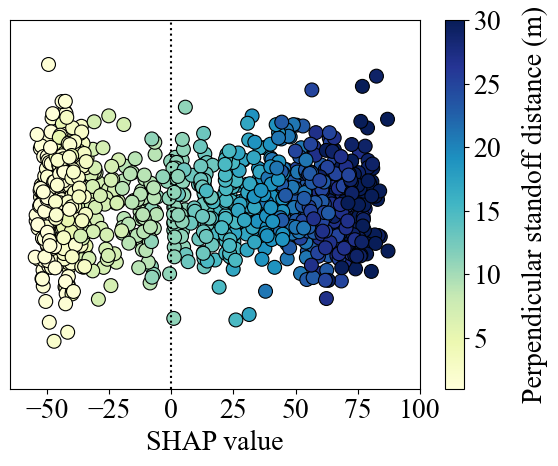

In [19]:
selected_shap_values = shap_values[0]

# Assuming shap_values2 is the SHAP values array and X_train is the NumPy array
feature_idx = 1  # Index of the feature you want to visualize

# Extract the SHAP values and feature values for the specific feature
feature_shap_values = selected_shap_values[:, feature_idx]  # SHAP values for the feature
feature_values = X_train[:, feature_idx]  # Feature values

# Set up the plot
plt.figure(figsize=(6, 5))

# Create a jitter for y-values to better visualize overlapping points
y_random_jitter = np.random.normal(loc=0, scale=0.1, size=feature_shap_values.size)

# Set y-axis limits
plt.ylim(-0.5, 0.5)
print(min(feature_shap_values), max(feature_shap_values))
plt.xlim(-65, 100) 

# Plot the scatter plot with color mapping based on feature values
sns.scatterplot(
    x=feature_shap_values, 
    y=y_random_jitter, 
    s=100, 
    hue=feature_values, 
    palette='YlGnBu', 
    edgecolor='black', 
    legend=None, 
    alpha=1
)

# Remove y-ticks
plt.yticks([])
plt.xticks([-50,-25,0,25,50,75,100])

# Create a color bar with a label
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=feature_values.min(), vmax=feature_values.max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Perpendicular standoff distance (m)', rotation=90, labelpad=15, fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add a vertical line at the mean SHAP value
mean_val = 0
plt.axvline(mean_val, color='black', linestyle=':')

# Set the title and labels with appropriate font sizes
#plt.title('Superplasticiser %', fontsize=18)
plt.xlabel('SHAP value', fontsize=20)
plt.xticks(fontsize=20)

# Adjust layout for better fit
plt.tight_layout()

plt.savefig('End_ANN4_5.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()

-17.42166179849046 18.487976067526134


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


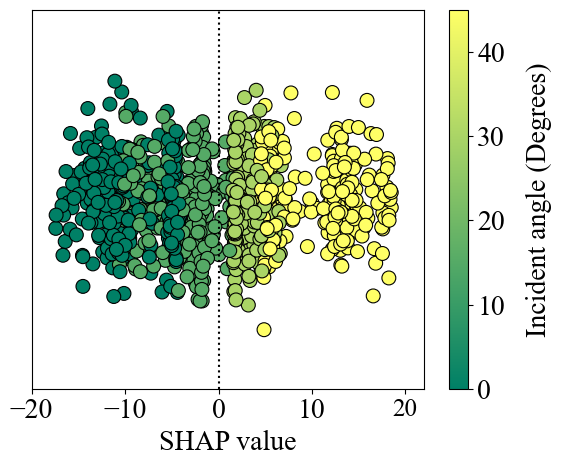

In [21]:
selected_shap_values = shap_values[0]

# Assuming shap_values2 is the SHAP values array and X_train is the NumPy array
feature_idx = 2  # Index of the feature you want to visualize

# Extract the SHAP values and feature values for the specific feature
feature_shap_values = selected_shap_values[:, feature_idx]  # SHAP values for the feature
feature_values = X_train[:, feature_idx]  # Feature values

# Set up the plot
plt.figure(figsize=(6, 5))

# Create a jitter for y-values to better visualize overlapping points
y_random_jitter = np.random.normal(loc=0, scale=0.1, size=feature_shap_values.size)

# Set y-axis limits
plt.ylim(-0.5, 0.5)
print(min(feature_shap_values), max(feature_shap_values))
plt.xlim(-20, 22) 

# Plot the scatter plot with color mapping based on feature values
sns.scatterplot(
    x=feature_shap_values, 
    y=y_random_jitter, 
    s=100, 
    hue=feature_values, 
    palette='summer', 
    edgecolor='black', 
    legend=None, 
    alpha=1
)

# Remove y-ticks
plt.yticks([])
#plt.xticks([-10,-5,0,5,10,15])

# Create a color bar with a label
sm = plt.cm.ScalarMappable(cmap="summer", norm=plt.Normalize(vmin=feature_values.min(), vmax=feature_values.max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Incident angle (Degrees)', rotation=90, labelpad=15, fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add a vertical line at the mean SHAP value
mean_val = 0
plt.axvline(mean_val, color='black', linestyle=':')

# Set the title and labels with appropriate font sizes
#plt.title('Superplasticiser %', fontsize=18)
plt.xlabel('SHAP value', fontsize=20)
plt.xticks(fontsize=20)

# Adjust layout for better fit
plt.tight_layout()

plt.savefig('End_ANN4_6.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()